In [134]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import axes

First, we need to define our physical parameters: the lengths of each string, the mass of each pendulum weight, gravity, and initial conditions for our differential equations.

In [370]:
L1 = .25 # Lengths or strings in m
L2 = .25
m1 = .1 # masses in kg
m2 = .1
g = 9.8 # force of gravity

a0 = [np.pi/6, 0, np.pi/4, 0] # initial conditions

tmax, dt = 5, 0.01 
t = np.arange(0, tmax+dt, dt) # time interval

Next, we need to define our function we will numerically solve. What I have done here is defined the second derivatives of the angles (phi double dots) as the first derivative of an arbitrary parameter (a dots). This "reduces" the order of our differential equations to first order.

In [371]:
def derivative(a, t, m1, m2, L1, L2):
    
    phi1, a1, phi2, a2 = a # initializing parameters
    
    phi1dot = a1
    a1dot = (-(m1+m2)*g*phi1 + m2*g*phi2)/(m1*L1)
    
    phi2dot = a2
    a2dot = (-(1+m2/m1)*g*phi2 + ((m1+m2)/m1)*g*phi1)/L2
    
    return phi1dot, a1dot, phi2dot, a2dot

Now, we will solve our first order ODE using the odeint package. We must give it our initial conditions for angle and speed, and the physical parameters we already specified. We then extract the phi_1(t) and phi_2(t) from our solutions array. 

In [372]:
solutions = odeint(derivative, a0, t, args=(L1, L2, m1, m2)) 

phi1, phi2 = solutions[:,0], solutions[:,2] # extracting our position functions

Finally, we can plot the positions as functions of time.

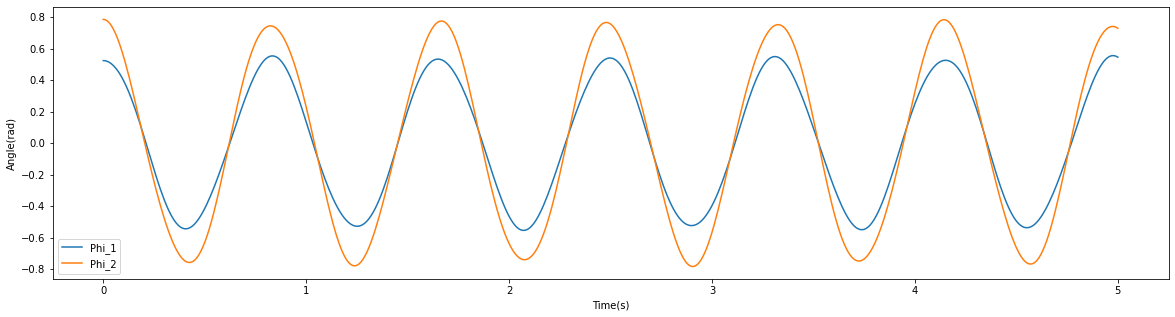

In [373]:
plt.rcParams["figure.figsize"] = (20,5) # makes the plot bigger
plt.figure()
plt.xlabel('Time(s)')
plt.ylabel('Angle(rad)')
plt.plot(t, phi1, label='Phi_1')
plt.plot(t, phi2, label='Phi_2')
plt.legend()